In [64]:
import numpy as np

In [9]:
import pandas as pd

In [50]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [21]:
mi_primer_dataset= make_classification(n_samples=550,n_features=2,n_redundant=0,n_classes=2,random_state=69)

In [22]:
mi_primer_dataset

(array([[ 1.37342896, -2.11027817],
        [-0.11264096, -0.73224036],
        [ 1.033002  , -1.97788147],
        ..., 
        [ 1.18667711, -1.62362855],
        [-0.3190903 ,  1.33702173],
        [-1.78093792,  0.54123715]]),
 array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0

In [23]:
#lo convertimos en un dataframe de pandas

In [24]:
dataset_clasification = pd.DataFrame(mi_primer_dataset[0])

In [25]:
dataset_clasification[:5]

,0,1
0,1.373429,-2.110278
1,-0.112641,-0.732240
2,1.033002,-1.977881
3,0.017650,1.352667
4,1.471603,-0.823313


In [26]:
dataset_clasification["clase"] = mi_primer_dataset[1]

In [27]:
dataset_clasification[:5]

,0,1,clase
0,1.373429,-2.110278,1
1,-0.112641,-0.732240,0
2,1.033002,-1.977881,1
3,0.017650,1.352667,0
4,1.471603,-0.823313,1


In [28]:
dataset_clasification.columns=["hormona_a","hormona_b","calvo"]

In [29]:
dataset_clasification[:5]

,hormona_a,hormona_b,calvo
0,1.373429,-2.110278,1
1,-0.112641,-0.732240,0
2,1.033002,-1.977881,1
3,0.017650,1.352667,0
4,1.471603,-0.823313,1


In [30]:
#convertirmos las columnas negativas a positivas

In [31]:
dataset_clasification["hormona_a"] =dataset_clasification["hormona_a"] + 5

In [32]:
dataset_clasification["hormona_b"] =dataset_clasification["hormona_b"]+5

In [33]:
dataset_clasification.describe()

,hormona_a,hormona_b,calvo
count,550.000000,550.000000,550.000000
mean,5.025689,4.962781,0.500000
std,1.384512,1.225263,0.500455
min,0.667557,1.807363,0.000000
25%,3.983195,3.997891,0.000000
50%,5.116615,5.100932,0.500000
75%,6.080026,6.003215,1.000000
max,8.165916,7.446602,1.000000


In [34]:
#separamos entre train y test

In [35]:
#version de scikit learn

In [36]:
import sklearn

In [37]:
sklearn.__version__

'0.18'

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
dataset_clasificacion_spliteado = train_test_split(dataset_clasification, train_size=0.8,test_size=0.2)

In [42]:
len(dataset_clasificacion_spliteado) #devuelve una lista con dos dataframe

2

In [44]:
dataset_clasificacion_train=dataset_clasificacion_spliteado[0] #train
dataset_clasificacion_test=dataset_clasificacion_spliteado[1] #testings

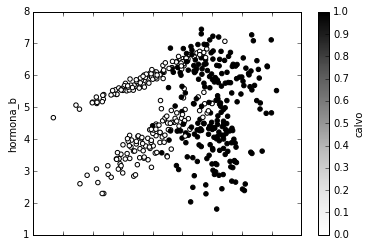

In [48]:
dataset_clasificacion_train.plot(kind="scatter",x="hormona_a",y="hormona_b",c="calvo")

In [51]:
plt.style.use("ggplot")

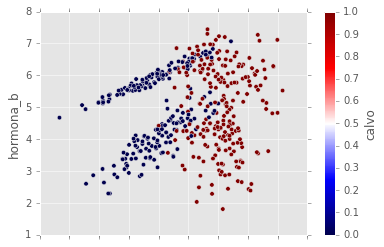

In [55]:
dataset_clasificacion_train.plot(kind="scatter",x="hormona_a",y="hormona_b",c="calvo",cmap="seismic")

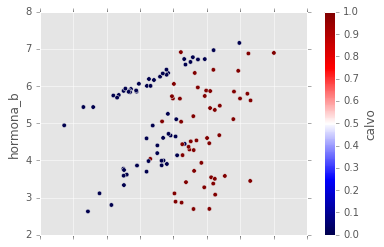

In [56]:
dataset_clasificacion_test.plot(kind="scatter",x="hormona_a",y="hormona_b",c="calvo",cmap="seismic")

In [57]:
def plot_decision_regions(clf, X, y, fig=None, title='', xlabel='', ylabel='', figsize=(8,6)):
    """
    Dibuja las regiones de decisión de un clasificador de sklearn.
    Toma como argumentos:
        - clf: la instancia del clasificador entrenado.
        - X: las features del dataset.
        - y: las labels del dataset.
        - fig: la plt.figure() o axes a usar. Si es None, se creará una figure nueva.
        - title: el título del gráfico.
        - xlabel: el nombre del eje x.
        - ylabel: el nombre del eje y.
        - figsize: si fig es None, el tamaño de la figura a crear (ancho, alto)
    Devuelve:
        Nada. Simplemente dibuja el resultado con Matplotlib.
    """
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(list(reversed(['#FFAAAA', '#AAFFAA', '#AAAAFF'])))
    cmap_bold = ListedColormap(list(reversed(['#FF0000', '#00FF00', '#0000FF'])))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .05  # step size in the mesh
    x_min, x_max = X.values[:, 0].min() - .5, X.values[:, 0].max() + .5
    y_min, y_max = X.values[:, 1].min() - .5, X.values[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    if fig is None:
        figura = plt.figure(figsize=figsize)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.4)

        plt.scatter(X.values[:, 0], X.values[:, 1], c=y.values,
                    cmap=cmap_bold, edgecolors='k')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        #plt.xticks(())
        #plt.yticks(())
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        
    else:
        fig.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.4)

        fig.scatter(X.values[:, 0], X.values[:, 1], c=y.values,
                    cmap=cmap_bold, edgecolors='k')
        fig.set_title(title)
        fig.set_xlabel(xlabel)
        fig.set_ylabel(ylabel)
        fig.set_xticks(())
        fig.set_yticks(())
        fig.set_xlim(xx.min(), xx.max())
        fig.set_ylim(yy.min(), yy.max())

## Regresion logistica

In [58]:
from sklearn.linear_model import LogisticRegression

In [60]:
logReg=LogisticRegression()
#vamos a entrenar el modelo
logReg.fit( X=dataset_clasificacion_train[["hormona_a","hormona_b"]], #features
            y=dataset_clasificacion_train["calvo"])#label

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
logReg.predict(dataset_clasificacion_test[["hormona_a","hormona_b"]])

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [65]:
np.array(dataset_clasificacion_test["calvo"])

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [67]:
logReg.score(X=dataset_clasificacion_test[["hormona_a","hormona_b"]],y=dataset_clasificacion_test["calvo"])

0.80909090909090908

In [68]:
# de 0,77 para arriba esta bien 

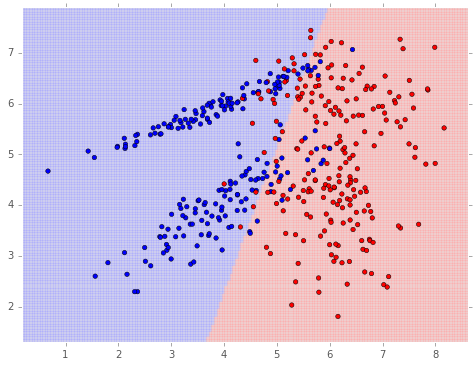

In [69]:
plot_decision_regions(logReg,dataset_clasificacion_train[["hormona_a","hormona_b"]],
                             dataset_clasificacion_train["calvo"])

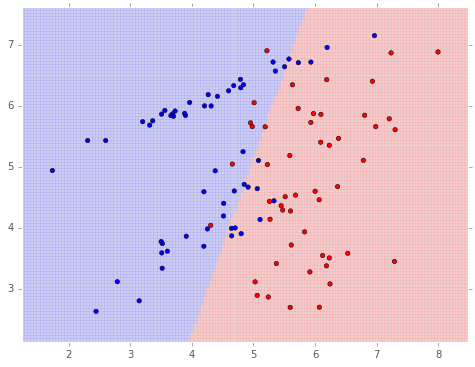

In [70]:
plot_decision_regions(logReg,dataset_clasificacion_test[["hormona_a","hormona_b"]],
                             dataset_clasificacion_test["calvo"])

## decision trees

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
arbol1 = DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [73]:
arbol1.fit( X=dataset_clasificacion_train[["hormona_a","hormona_b"]], #features
            y=dataset_clasificacion_train["calvo"])#label

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [74]:
arbol1.score(X=dataset_clasificacion_test[["hormona_a","hormona_b"]],y=dataset_clasificacion_test["calvo"])

0.84545454545454546

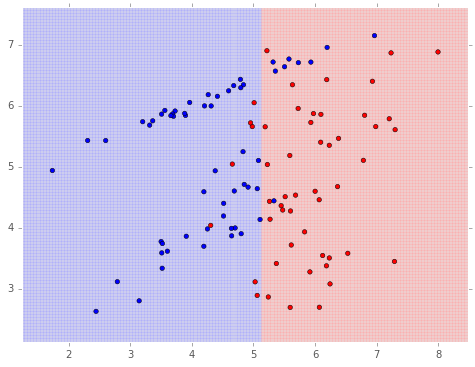

In [75]:
plot_decision_regions(arbol1,dataset_clasificacion_test[["hormona_a","hormona_b"]],
                             dataset_clasificacion_test["calvo"])

In [77]:
arbol2 = DecisionTreeClassifier(criterion="entropy",max_depth=50)
arbol2.fit( X=dataset_clasificacion_train[["hormona_a","hormona_b"]], #features
            y=dataset_clasificacion_train["calvo"])#label
arbol2.score(X=dataset_clasificacion_test[["hormona_a","hormona_b"]],y=dataset_clasificacion_test["calvo"])

0.87272727272727268

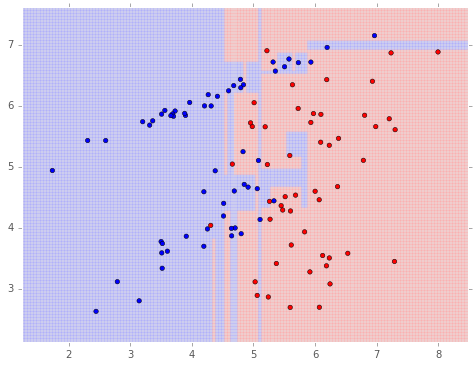

In [78]:
plot_decision_regions(arbol2,dataset_clasificacion_test[["hormona_a","hormona_b"]],
                             dataset_clasificacion_test["calvo"])

In [79]:
# para saber si sobre ajusta, llamamos de nuevo al score y pasamos el dataset TRAIN, luego chequeamos los dos errores

## Nearest Neighbors

In [81]:
# el parametro importante es el numero de vecinos a contemplar
# supongamos que k=3

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn1 = KNeighborsClassifier(n_neighbors=5)

In [87]:
knn1.fit(X=dataset_clasificacion_train[["hormona_a","hormona_b"]],
         y=dataset_clasificacion_train["calvo"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [89]:
knn1.score(X=dataset_clasificacion_test[["hormona_a","hormona_b"]],
          y=dataset_clasificacion_test["calvo"])

0.90000000000000002

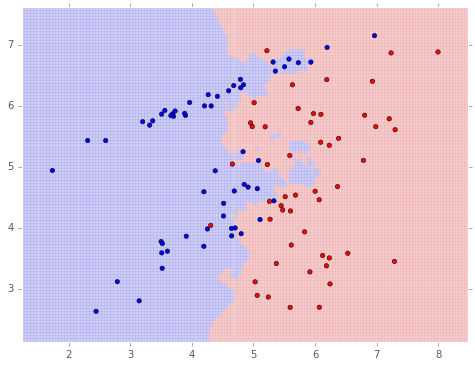

In [90]:
plot_decision_regions(knn1,dataset_clasificacion_test[["hormona_a","hormona_b"]],
                             dataset_clasificacion_test["calvo"])